### W200 Project 02 - US Domestic Air Travel Tends Data Analysis
<b>Team 4:</b>

- Aashray Puri, Isaac Madera, and Raymond Hung

<b>Overview:</b>

This document provides a detailed exploration of US domestic air travel data by conducting an extensive exploratory data analysis (EDA) with a particular focus on flight trends, cancellations, and delays, as well as weather patterns. 

<b>Our Approach:</b>

To ensure that our exploratory data analysis (EDA) is accurate and reliable,  we apply data 
pre-processing and clean-up procedures to remove any outliers, missing values, or inconsistencies in the data. Finally, we conduct our initial analysis on 2019-21 flight data at the end of notebook. 

Please refer to the other Jupyter Notebooks in this repo to see our other findings and insights. 

### Data Imports

In [1]:
# Modules/Packages
import sys
print("System ", sys.version,"\n")
import pandas as pd
print("Pandas ", pd.__version__)
import numpy as np
print("Numpy ", np.__version__)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline
import seaborn as sns
print("Seaborn ", sns.__version__)
from datetime import datetime

# Pandas Display Options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

System  3.8.16 (default, Mar  1 2023, 21:19:10) 
[Clang 14.0.6 ] 

Pandas  1.5.3
Numpy  1.23.5
Seaborn  0.12.2


In [2]:
# Datasets
flights_2019 = pd.read_csv('../Combined_Flights_2019.csv')
flights_2020 = pd.read_csv('../Combined_Flights_2020.csv')
flights_2021 = pd.read_csv('../Combined_Flights_2021.csv')
airlines_df = pd.read_csv("../Airlines.csv")

### Sanity Checking

In [3]:
# Shape of Kaggle 2019-2021 datasets loaded
print("2019 dataframe shape:", flights_2019.shape)
print("2020 dataframe shape:", flights_2020.shape)
print("2021 dataframe shape:", flights_2021.shape)

2019 dataframe shape: (8091684, 61)
2020 dataframe shape: (5022397, 61)
2021 dataframe shape: (6311871, 61)


In [4]:
# List of Column Names & Respective Data Types 2019-2021
print(" 2019 DF Columns & Dtypes ".center(56,"-"))
print(flights_2019.dtypes)
print("")
print(" 2020 DF Columns & Dtypes ".center(56,"-"))
print(flights_2020.dtypes)
print("")
print(" 2021 DF Columns & Dtypes ".center(56,"-"))
print(flights_2021.dtypes)

--------------- 2019 DF Columns & Dtypes ---------------
FlightDate                                  object
Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Diverted                                      bool
CRSDepTime                                   int64
DepTime                                    float64
DepDelayMinutes                            float64
DepDelay                                   float64
ArrTime                                    float64
ArrDelayMinutes                            float64
AirTime                                    float64
CRSElapsedTime                             float64
ActualElapsedTime                          float64
Distance                                   float64
Year                                         int64
Quarter                                      int64
Month                    

In [5]:
# List of Column Names & Respective Data Types 
# 2019 head
flights_2019.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,"1,209.00",0.00,-3.00,"1,350.00",0.00,83.00,113.00,101.00,552.00,2019,2,4,1,1,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N253NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,219.00","1,342.00",8.00,1405,-15.00,0.00,-1.00,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,"1,200.00",0.00,-12.00,"1,348.00",0.00,89.00,113.00,108.00,552.00,2019,2,4,2,2,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N242NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,210.00","1,339.00",9.00,1405,-17.00,0.00,-2.00,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,"1,203.00",0.00,-9.00,"1,342.00",0.00,82.00,113.00,99.00,552.00,2019,2,4,3,3,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N247NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,11.00,"1,214.00","1,336.00",6.00,1405,-23.00,0.00,-2.00,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,"1,435.00",143.00,143.00,"1,621.00",136.00,83.00,113.00,106.00,552.00,2019,2,4,4,4,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N220NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1.00,9.00,1200-1259,17.00,"1,452.00","1,615.00",6.00,1405,136.00,1.00,9.00,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,"1,216.00",4.00,4.00,"1,410.00",5.00,83.00,113.00,114.00,552.00,2019,2,4,5,5,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N255NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,0.00,1200-1259,18.00,"1,234.00","1,357.00",13.00,1405,5.00,0.00,0.00,1400-1459,3,0


In [6]:
 # 2019 tail
flights_2019.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
8091679,2019-01-23,ExpressJet Airlines Inc.,MEM,IAH,False,False,640,634.00,0.00,-6.00,853.00,13.00,97.00,120.00,139.00,468.00,2019,1,1,23,3,UA,UA_CODESHARE,19977,UA,4252,EV,20366,EV,N16561,4252,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0600-0659,36.00,710.00,847.00,6.00,840,13.00,0.00,0.00,0800-0859,2,0
8091680,2019-01-24,ExpressJet Airlines Inc.,MEM,IAH,False,False,640,631.00,0.00,-9.00,830.00,0.00,83.00,120.00,119.00,468.00,2019,1,1,24,4,UA,UA_CODESHARE,19977,UA,4252,EV,20366,EV,N14203,4252,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0600-0659,26.00,657.00,820.00,10.00,840,-10.00,0.00,-1.00,0800-0859,2,0
8091681,2019-01-25,ExpressJet Airlines Inc.,MEM,IAH,False,False,640,632.00,0.00,-8.00,828.00,0.00,88.00,120.00,116.00,468.00,2019,1,1,25,5,UA,UA_CODESHARE,19977,UA,4252,EV,20366,EV,N13538,4252,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0600-0659,22.00,654.00,822.00,6.00,840,-12.00,0.00,-1.00,0800-0859,2,0
8091682,2019-01-26,ExpressJet Airlines Inc.,MEM,IAH,False,False,640,630.00,0.00,-10.00,831.00,0.00,89.00,120.00,121.00,468.00,2019,1,1,26,6,UA,UA_CODESHARE,19977,UA,4252,EV,20366,EV,N13903,4252,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0600-0659,26.00,656.00,825.00,6.00,840,-9.00,0.00,-1.00,0800-0859,2,0
8091683,2019-01-28,ExpressJet Airlines Inc.,MEM,IAH,False,False,640,632.00,0.00,-8.00,825.00,0.00,81.00,120.00,113.00,468.00,2019,1,1,28,1,UA,UA_CODESHARE,19977,UA,4252,EV,20366,EV,N11548,4252,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0600-0659,20.00,652.00,813.00,12.00,840,-15.00,0.00,-1.00,0800-0859,2,0


In [7]:
# 2020 head
flights_2020.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,"1,858.00",0.00,-7.00,"2,034.00",0.00,76.00,111.00,96.00,477.00,2020,3,9,1,2,AA,AA_CODESHARE,19805,AA,5020,OH,20397,OH,N506AE,5020,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,11267,1126702,31267,"Dayton, OH",OH,39,Ohio,44,0.00,-1.00,1900-1959,16.00,"1,914.00","2,030.00",4.00,2056,-22.00,0.00,-2.00,2000-2059,2,0.00
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,"1,858.00",0.00,-7.00,"2,027.00",0.00,68.00,111.00,89.00,477.00,2020,3,9,2,3,AA,AA_CODESHARE,19805,AA,5020,OH,20397,OH,N512AE,5020,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,11267,1126702,31267,"Dayton, OH",OH,39,Ohio,44,0.00,-1.00,1900-1959,16.00,"1,914.00","2,022.00",5.00,2056,-29.00,0.00,-2.00,2000-2059,2,0.00
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,"1,855.00",0.00,-10.00,"2,122.00",26.00,77.00,111.00,147.00,477.00,2020,3,9,3,4,AA,AA_CODESHARE,19805,AA,5020,OH,20397,OH,N710PS,5020,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,11267,1126702,31267,"Dayton, OH",OH,39,Ohio,44,0.00,-1.00,1900-1959,65.00,"2,000.00","2,117.00",5.00,2056,26.00,1.00,1.00,2000-2059,2,0.00
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,"1,857.00",0.00,-8.00,"2,027.00",0.00,73.00,111.00,90.00,477.00,2020,3,9,4,5,AA,AA_CODESHARE,19805,AA,5020,OH,20397,OH,N712PS,5020,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,11267,1126702,31267,"Dayton, OH",OH,39,Ohio,44,0.00,-1.00,1900-1959,13.00,"1,910.00","2,023.00",4.00,2056,-29.00,0.00,-2.00,2000-2059,2,0.00
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,"1,856.00",0.00,-9.00,"2,026.00",0.00,72.00,111.00,90.00,477.00,2020,3,9,5,6,AA,AA_CODESHARE,19805,AA,5020,OH,20397,OH,N705PS,5020,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,11267,1126702,31267,"Dayton, OH",OH,39,Ohio,44,0.00,-1.00,1900-1959,14.00,"1,910.00","2,022.00",4.00,2056,-30.00,0.00,-2.00,2000-2059,2,0.00


In [8]:
# # 2020 head
flights_2020.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
5022392,2020-04-01,Republic Airlines,CLT,DEN,True,False,1645,NaN,NaN,NaN,NaN,NaN,NaN,235.00,NaN,"1,337.00",2020,2,4,1,3,UA,UA_CODESHARE,19977,UA,3404,YX,20452,YX,N648RW,3404,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,1840,NaN,NaN,NaN,1800-1859,6,0.00
5022393,2020-04-01,Republic Airlines,CLE,EWR,False,False,1700,"1,652.00",0.00,-8.00,"1,812.00",0.00,61.00,107.00,80.00,404.00,2020,2,4,1,3,UA,UA_CODESHARE,19977,UA,3403,YX,20452,YX,N645RW,3403,11042,1104205,30647,"Cleveland, OH",OH,39,Ohio,44,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0.00,-1.00,1700-1759,13.00,"1,705.00","1,806.00",6.00,1847,-35.00,0.00,-2.00,1800-1859,2,0.00
5022394,2020-04-01,Republic Airlines,BUF,EWR,False,False,700,933.00,153.00,153.00,"1,040.00",132.00,55.00,88.00,67.00,282.00,2020,2,4,1,3,UA,UA_CODESHARE,19977,UA,3402,YX,20452,YX,N725YX,3402,10792,1079206,30792,"Buffalo, NY",NY,36,New York,22,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,1.00,10.00,0700-0759,8.00,941.00,"1,036.00",4.00,828,132.00,1.00,8.00,0800-0859,2,0.00
5022395,2020-04-01,Republic Airlines,HRL,IAH,False,False,730,720.00,0.00,-10.00,831.00,0.00,52.00,78.00,71.00,295.00,2020,2,4,1,3,UA,UA_CODESHARE,19977,UA,3401,YX,20452,YX,N730YX,3401,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.00,-1.00,0700-0759,11.00,731.00,823.00,8.00,848,-17.00,0.00,-2.00,0800-0859,2,0.00
5022396,2020-04-01,Republic Airlines,DCA,ORD,False,False,845,837.00,0.00,-8.00,930.00,0.00,96.00,132.00,113.00,612.00,2020,2,4,1,3,UA,UA_CODESHARE,19977,UA,3400,YX,20452,YX,N861RW,3400,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,0800-0859,10.00,847.00,923.00,7.00,957,-27.00,0.00,-2.00,0900-0959,3,0.00


In [9]:
# # 2021 head
flights_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.00,0.00,-10.00,818.00,0.00,49.00,79.00,64.00,262.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3133,OO,20304,OO,N728SK,3133,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,0.00,-1.00,0700-0759,10.00,724.00,813.00,5.00,843,-25.00,0.00,-2.00,0800-0859,2,0.00
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.00,0.00,-5.00,"1,031.00",0.00,48.00,78.00,74.00,262.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3134,OO,20304,OO,N752SK,3134,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,0.00,-1.00,0900-0959,23.00,940.00,"1,028.00",3.00,1040,-9.00,0.00,-1.00,1000-1059,2,0.00
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,"1,321.00",0.00,-9.00,"1,501.00",0.00,129.00,180.00,160.00,843.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3135,OO,20304,OO,N766SK,3135,13296,1329604,30721,"Manchester, NH",NH,33,New Hampshire,14,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1300-1359,15.00,"1,336.00","1,445.00",16.00,1530,-29.00,0.00,-2.00,1500-1559,4,0.00
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,"1,636.00",0.00,-9.00,"2,002.00",0.00,112.00,145.00,146.00,868.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3136,OO,20304,OO,N752EV,3136,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,15323,1532305,35323,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,0.00,-1.00,1600-1659,27.00,"1,703.00","1,955.00",7.00,2010,-8.00,0.00,-1.00,2000-2059,4,0.00
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,"1,838.00",0.00,-6.00,"1,903.00",0.00,69.00,101.00,85.00,425.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3137,OO,20304,OO,N715SK,3137,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10561,1056103,30561,"Bakersfield, CA",CA,6,California,91,0.00,-1.00,1800-1859,13.00,"1,851.00","1,900.00",3.00,1925,-22.00,0.00,-2.00,1900-1959,2,0.00


In [10]:
# # 2021 tail
flights_2021.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
6311866,2021-06-01,Southwest Airlines Co.,BNA,MDW,False,False,1255,"1,301.00",6.00,6.00,"1,421.00",0.00,66.00,95.00,80.00,395.00,2021,2,6,1,2,WN,WN,19393,WN,1740,WN,19393,WN,N8695D,1740,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,0.00,0.00,1200-1259,9.00,"1,310.00","1,416.00",5.00,1430,-9.00,0.00,-1.00,1400-1459,2,0.00
6311867,2021-06-01,Southwest Airlines Co.,BNA,MDW,False,False,730,727.00,0.00,-3.00,845.00,0.00,62.00,90.00,78.00,395.00,2021,2,6,1,2,WN,WN,19393,WN,2197,WN,19393,WN,N7863A,2197,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,0700-0759,13.00,740.00,842.00,3.00,900,-15.00,0.00,-1.00,0900-0959,2,0.00
6311868,2021-06-01,Southwest Airlines Co.,BNA,MIA,False,False,800,757.00,0.00,-3.00,"1,101.00",0.00,105.00,130.00,124.00,806.00,2021,2,6,1,2,WN,WN,19393,WN,443,WN,19393,WN,N7867A,443,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,13303,1330303,32467,"Miami, FL",FL,12,Florida,33,0.00,-1.00,0800-0859,14.00,811.00,"1,056.00",5.00,1110,-9.00,0.00,-1.00,1100-1159,4,0.00
6311869,2021-06-01,Southwest Airlines Co.,BNA,MIA,False,False,1300,"1,252.00",0.00,-8.00,"1,559.00",0.00,114.00,140.00,127.00,806.00,2021,2,6,1,2,WN,WN,19393,WN,2991,WN,19393,WN,N7827A,2991,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,13303,1330303,32467,"Miami, FL",FL,12,Florida,33,0.00,-1.00,1300-1359,8.00,"1,300.00","1,554.00",5.00,1620,-21.00,0.00,-2.00,1600-1659,4,0.00
6311870,2021-06-01,Southwest Airlines Co.,BNA,MKE,False,False,1925,"1,948.00",23.00,23.00,"2,116.00",21.00,71.00,90.00,88.00,475.00,2021,2,6,1,2,WN,WN,19393,WN,886,WN,19393,WN,N919WN,886,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,13342,1334207,33342,"Milwaukee, WI",WI,55,Wisconsin,45,1.00,1.00,1900-1959,12.00,"2,000.00","2,111.00",5.00,2055,21.00,1.00,1.00,2000-2059,2,0.00


### Data Cleansing

In [11]:
# Use the df to join multiple years
combined_df = pd.concat([flights_2019, flights_2020, flights_2021])

In [12]:
# Type cast 'FlightDate' to date time in nanosecods
combined_df['FlightDate'] = combined_df['FlightDate'].astype('datetime64[ns]')

In [13]:
# Combined DF info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425952 entries, 0 to 6311870
Data columns (total 61 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                    

In [14]:
# Check for duplicates  
combined_df.duplicated().sum()

0

In [15]:
# Check for nulls
combined_df.isnull().sum()

FlightDate                                      0
Airline                                         0
Origin                                          0
Dest                                            0
Cancelled                                       0
Diverted                                        0
CRSDepTime                                      0
DepTime                                    555839
DepDelayMinutes                            556014
DepDelay                                   556014
ArrTime                                    571323
ArrDelayMinutes                            609888
AirTime                                    609888
CRSElapsedTime                                 16
ActualElapsedTime                          609888
Distance                                        0
Year                                            0
Quarter                                         0
Month                                           0
DayofMonth                                      0


In [16]:
# Dataframe Filters for Subsetting
operated_flights = combined_df['Cancelled'] == False
canceled_flights = combined_df['Cancelled'] == True
diverted_flights = combined_df['Diverted'] == True

In [17]:
# Cancelled vs Diverted Flights
canceled_df = combined_df[canceled_flights]
print("# of cancelled flights: ", len(canceled_df))
diverted_df = combined_df[diverted_flights]
print("# of diverted flights: ", len(diverted_df))
print(f"Total: {len(canceled_df) + len(diverted_df)}")

# of cancelled flights:  565702
# of diverted flights:  44184
Total: 609886


In [18]:
# Check Summary Statistics for all columns
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRSDepTime,"19,425,952.00","1,324.37",477.93,1.00,920.00,"1,317.00","1,725.00","2,359.00"
DepTime,"18,870,113.00","1,326.69",489.71,1.00,921.00,"1,321.00","1,732.00","2,400.00"
DepDelayMinutes,"18,869,938.00",11.90,45.33,0.00,0.00,0.00,4.00,"3,890.00"
DepDelay,"18,869,938.00",8.26,46.44,-131.00,-6.00,-3.00,4.00,"3,890.00"
ArrTime,"18,854,629.00","1,471.78",517.26,1.00,"1,100.00","1,506.00","1,908.00","2,400.00"
ArrDelayMinutes,"18,816,064.00",11.93,44.89,0.00,0.00,0.00,4.00,"3,864.00"
AirTime,"18,816,064.00",108.36,68.41,4.00,59.00,91.00,138.00,"1,557.00"
CRSElapsedTime,"19,425,936.00",138.18,69.91,-292.00,88.00,120.00,168.00,"1,509.00"
ActualElapsedTime,"18,816,064.00",132.42,69.98,13.00,82.00,115.00,162.00,"1,604.00"
Distance,"19,425,952.00",773.57,575.11,29.00,353.00,621.00,"1,010.00","5,812.00"


In [19]:
# Columns to keep 
cols = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
     'Diverted', 'DepDelay', 'AirTime', 'Distance', 'Year',
     'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
     'OriginCityName', 'OriginState', 'DestCityName', 'DestState', 'DepDel15', 'DepTimeBlk']

print("keeping",len(cols),"columns (excluding FlightDate as the Index)")

print(combined_df.columns)

keeping 20 columns (excluding FlightDate as the Index)
Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15

### Data Merging & Subsetting

In [20]:
airlines_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [21]:
airlines_df.tail()

,Code,Description
1566,ZW,Air Wisconsin Airlines Corp
1567,ZX,Air Georgian
1568,ZX (1),Airbc Ltd.
1569,ZY,Atlantic Gulf Airlines
1570,ZYZ,Skyway Aviation Inc.


In [22]:
print(f"There are {airlines_df.duplicated().sum()} duplicates")

There are 0 duplicates


In [23]:
combined_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,"1,209.00",0.00,-3.00,"1,350.00",0.00,83.00,113.00,101.00,552.00,2019,2,4,1,1,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N253NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,219.00","1,342.00",8.00,1405,-15.00,0.00,-1.00,1400-1459,3,0.00
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,"1,200.00",0.00,-12.00,"1,348.00",0.00,89.00,113.00,108.00,552.00,2019,2,4,2,2,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N242NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,210.00","1,339.00",9.00,1405,-17.00,0.00,-2.00,1400-1459,3,0.00
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,"1,203.00",0.00,-9.00,"1,342.00",0.00,82.00,113.00,99.00,552.00,2019,2,4,3,3,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N247NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,11.00,"1,214.00","1,336.00",6.00,1405,-23.00,0.00,-2.00,1400-1459,3,0.00
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,"1,435.00",143.00,143.00,"1,621.00",136.00,83.00,113.00,106.00,552.00,2019,2,4,4,4,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N220NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1.00,9.00,1200-1259,17.00,"1,452.00","1,615.00",6.00,1405,136.00,1.00,9.00,1400-1459,3,0.00
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,"1,216.00",4.00,4.00,"1,410.00",5.00,83.00,113.00,114.00,552.00,2019,2,4,5,5,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N255NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,0.00,1200-1259,18.00,"1,234.00","1,357.00",13.00,1405,5.00,0.00,0.00,1400-1459,3,0.00


In [24]:
# Merge combined df with airlines
combined_df = pd.merge(combined_df, airlines_df, left_on='Marketing_Airline_Network', right_on='Code')

In [25]:
# Set FlightDate to Index
combined_df = combined_df.set_index('FlightDate')

In [26]:
# reorder columns: FlightDate, Airline
col_list = combined_df.columns.to_list()
col_list = col_list[0:1] + col_list[-1:] +col_list[1:-1]
combined_df = combined_df[col_list]

# rename columns
combined_df = combined_df.rename(columns={'Description':'MajorAirline'})

In [27]:
combined_df.head()

,Airline,MajorAirline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Code
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,Envoy Air,American Airlines Inc.,LIT,ORD,False,False,1212,"1,209.00",0.00,-3.00,"1,350.00",0.00,83.00,113.00,101.00,552.00,2019,2,4,1,1,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N253NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,219.00","1,342.00",8.00,1405,-15.00,0.00,-1.00,1400-1459,3,0.00,AA
2019-04-02,Envoy Air,American Airlines Inc.,LIT,ORD,False,False,1212,"1,200.00",0.00,-12.00,"1,348.00",0.00,89.00,113.00,108.00,552.00,2019,2,4,2,2,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N242NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,10.00,"1,210.00","1,339.00",9.00,1405,-17.00,0.00,-2.00,1400-1459,3,0.00,AA
2019-04-03,Envoy Air,American Airlines Inc.,LIT,ORD,False,False,1212,"1,203.00",0.00,-9.00,"1,342.00",0.00,82.00,113.00,99.00,552.00,2019,2,4,3,3,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N247NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1200-1259,11.00,"1,214.00","1,336.00",6.00,1405,-23.00,0.00,-2.00,1400-1459,3,0.00,AA
2019-04-04,Envoy Air,American Airlines Inc.,LIT,ORD,False,False,1212,"1,435.00",143.00,143.00,"1,621.00",136.00,83.00,113.00,106.00,552.00,2019,2,4,4,4,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N220NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1.00,9.00,1200-1259,17.00,"1,452.00","1,615.00",6.00,1405,136.00,1.00,9.00,1400-1459,3,0.00,AA
2019-04-05,Envoy Air,American Airlines Inc.,LIT,ORD,False,False,1212,"1,216.00",4.00,4.00,"1,410.00",5.00,83.00,113.00,114.00,552.00,2019,2,4,5,5,AA,AA_CODESHARE,19805,AA,3315,MQ,20398,MQ,N255NN,3315,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,0.00,1200-1259,18.00,"1,234.00","1,357.00",13.00,1405,5.00,0.00,0.00,1400-1459,3,0.00,AA


In [28]:
combined_df.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10',
               ...
               '2021-06-30', '2021-06-30', '2021-06-30', '2021-06-30',
               '2021-06-30', '2021-06-30', '2021-06-30', '2021-06-30',
               '2021-06-30', '2021-06-30'],
              dtype='datetime64[ns]', name='FlightDate', length=19425952, freq=None)

In [29]:
# Airport Long & Lat
airports = pd.read_csv('../airports.csv')
airports.columns = [x.lower() for x in airports.columns]

In [30]:
airports.head()

,iata,airport,city,state,country,latitude,longitude
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.04,-106.61
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.17,-150.00
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.64,-84.43
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.19,-97.67
4,BDL,Bradley International,Windsor Locks,CT,USA,41.94,-72.68


In [31]:
airports.tail()

,iata,airport,city,state,country,latitude,longitude
336,WRG,Wrangell,Wrangell,AK,USA,56.48,-132.37
337,WYS,Yellowstone,West Yellowstone,MT,USA,44.69,-111.12
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.28,-94.31
339,YAK,Yakutat,Yakutat,AK,USA,59.50,-139.66
340,YUM,Yuma MCAS-Yuma International,Yuma,AZ,USA,32.66,-114.61


In [32]:
# check for duplicates
airports.duplicated().sum()

0

In [33]:
# subset of 2021 flights
sub_2021_df = combined_df[combined_df['Year'] == 2021]

In [34]:
sub_2021_df.head()

,Airline,MajorAirline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Code
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-03,SkyWest Airlines Inc.,American Airlines Inc.,SGU,PHX,False,False,724,714.00,0.00,-10.00,818.00,0.00,49.00,79.00,64.00,262.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3133,OO,20304,OO,N728SK,3133,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,0.00,-1.00,0700-0759,10.00,724.00,813.00,5.00,843,-25.00,0.00,-2.00,0800-0859,2,0.00,AA
2021-03-03,SkyWest Airlines Inc.,American Airlines Inc.,PHX,SGU,False,False,922,917.00,0.00,-5.00,"1,031.00",0.00,48.00,78.00,74.00,262.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3134,OO,20304,OO,N752SK,3134,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,0.00,-1.00,0900-0959,23.00,940.00,"1,028.00",3.00,1040,-9.00,0.00,-1.00,1000-1059,2,0.00,AA
2021-03-03,SkyWest Airlines Inc.,American Airlines Inc.,MHT,ORD,False,False,1330,"1,321.00",0.00,-9.00,"1,501.00",0.00,129.00,180.00,160.00,843.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3135,OO,20304,OO,N766SK,3135,13296,1329604,30721,"Manchester, NH",NH,33,New Hampshire,14,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.00,-1.00,1300-1359,15.00,"1,336.00","1,445.00",16.00,1530,-29.00,0.00,-2.00,1500-1559,4,0.00,AA
2021-03-03,SkyWest Airlines Inc.,American Airlines Inc.,DFW,TRI,False,False,1645,"1,636.00",0.00,-9.00,"2,002.00",0.00,112.00,145.00,146.00,868.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3136,OO,20304,OO,N752EV,3136,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,15323,1532305,35323,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,0.00,-1.00,1600-1659,27.00,"1,703.00","1,955.00",7.00,2010,-8.00,0.00,-1.00,2000-2059,4,0.00,AA
2021-03-03,SkyWest Airlines Inc.,American Airlines Inc.,PHX,BFL,False,False,1844,"1,838.00",0.00,-6.00,"1,903.00",0.00,69.00,101.00,85.00,425.00,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3137,OO,20304,OO,N715SK,3137,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10561,1056103,30561,"Bakersfield, CA",CA,6,California,91,0.00,-1.00,1800-1859,13.00,"1,851.00","1,900.00",3.00,1925,-22.00,0.00,-2.00,1900-1959,2,0.00,AA


### Initial Findings (2019-2021)
    Part 1: Trends

In [35]:
# 2021-21 Cancelled Flights
cancelled = combined_df[combined_df['Cancelled'] == True]
cancelled = cancelled.resample("M").sum()
cancelled.head()

/var/folders/zt/_kpcyf4n4t9f1vk1fwpjkfg40000gn/T/ipykernel_62864/262733127.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancelled = cancelled.resample("M").sum()


,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,19550,0,26347743,"645,140.00","29,724.00","28,884.00",0.00,0.00,0.00,"2,375,255.00",0.00,"11,597,991.00",39471450,19550,19550,432512,73761,387515625,63343352,392487685,63343352,250478479,25047926849,619280440,517414,919874,250345618,25034641008,618698120,521708,922064,212.00,"1,177.00","3,354.00","226,150.00",0.00,0.00,29378563,0.00,0.00,0.00,56018,"1,386.00"
2019-02-28,18352,0,24618080,"771,267.00","33,795.00","32,876.00",0.00,0.00,0.00,"2,135,652.00",0.00,"10,280,737.00",37052688,18352,36704,283274,65622,362917443,61412792,367873114,61412792,236326543,23632723529,583339326,526003,1018371,236113098,23611379582,582831722,526684,1019159,257.00,"1,329.00","4,296.00","315,745.00",0.00,0.00,27460372,0.00,0.00,0.00,49892,"1,872.00"
2019-03-31,13562,0,17678146,"421,153.00","13,570.00","13,090.00",0.00,0.00,0.00,"1,839,315.00",0.00,"10,112,185.00",27381678,13562,40686,185375,55362,267481758,40126113,269563529,40126113,170647776,17064827861,428709463,342791,810663,170622779,17062328377,428441859,344607,813192,144.00,613.00,"2,474.00","186,664.00",0.00,0.00,19910967,0.00,0.00,0.00,47028,"1,035.00"
2019-04-30,15726,0,22313572,"572,844.00","19,428.00","18,629.00",0.00,0.00,0.00,"2,003,229.00",0.00,"10,568,621.00",31750794,31452,62904,250478,68590,310751908,44908476,313836870,44908476,198371315,19837193360,497686060,452927,849093,198159993,19816061273,497411623,452920,852652,197.00,856.00,"1,636.00","99,040.00",0.00,0.00,24682821,0.00,0.00,0.00,49802,612.00
2019-05-31,14146,0,19897708,"993,026.00","40,674.00","39,834.00",0.00,0.00,0.00,"1,729,186.00",0.00,"8,979,139.00",28560774,28292,70730,251662,52090,279260085,41752858,282324868,41746858,177822288,17782284942,448008892,428876,801685,177498415,17749897781,447481454,431926,802878,366.00,"1,885.00","1,660.00","114,108.00",0.00,0.00,21977731,0.00,0.00,0.00,42670,657.00


In [36]:
# 2019-21 Operating Flights 
operated = combined_df[combined_df['Cancelled'] == False]
operated['flight_count'] = True
operated = operated.resample("M").sum()
operated.head()

/var/folders/zt/_kpcyf4n4t9f1vk1fwpjkfg40000gn/T/ipykernel_62864/2937938453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operated['flight_count'] = True
/var/folders/zt/_kpcyf4n4t9f1vk1fwpjkfg40000gn/T/ipykernel_62864/2937938453.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  operated = operated.resample("M").sum()


,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings,flight_count
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,0,1450,820999199,"825,049,480.00","8,376,504.00","6,163,641.00","917,575,775.00","8,681,686.00","67,341,739.00","86,922,858.00","83,480,993.00","477,130,472.00",1249960881,619099,619099,9757193,2376720,12271842039,1661500364,12388567751,1661565415,7854198203,785422193326,19674994499,16879551,33795350,7854249615,785427334248,19675463521,16877907,33793799,"108,969.00","9,780.00","11,449,572.00","841,809,892.00","914,100,915.00","4,731,900.00",929102750,"2,911,886.00","117,144.00","-137,507.00",2202500,"1,462.00",619099
2019-02-28,0,1787,748259791,"754,435,976.00","9,480,558.00","7,713,345.00","836,697,096.00","9,901,408.00","61,721,311.00","79,321,687.00","76,606,074.00","434,875,752.00",1139955666,564614,1129228,8297091,2211869,11194156345,1500414862,11300432025,1500365803,7161057622,716107929543,17942069116,15377936,30600727,7161060063,716108173187,17942353609,15378368,30600602,"122,578.00","134,860.00","10,557,255.00","769,614,511.00","833,973,333.00","4,378,523.00",847432185,"5,237,977.00","132,709.00","26,284.00",2008002,"1,813.00",564614
2019-03-31,0,1130,900147342,"903,946,434.00","8,441,771.00","6,170,507.00","994,900,712.00","8,341,962.00","73,756,236.00","94,360,433.00","90,398,889.00","523,875,718.00",1364155521,675659,2026977,10889044,2796595,13395904832,1834580807,13523395148,1834536975,8572825602,857285176404,21472961642,18386847,36456331,8572850281,857287644098,21473226011,18385597,36452155,"115,818.00","-15,530.00","11,631,859.00","920,517,493.00","991,876,922.00","5,040,950.00",1005244663,"2,352,244.00","116,948.00","-200,561.00",2416800,"1,135.00",675659
2019-04-30,0,1616,866594439,"870,833,912.00","9,001,026.00","6,750,273.00","955,188,706.00","8,932,777.00","70,599,757.00","90,397,846.00","86,497,821.00","502,381,861.00",1317464127,1305066,2610132,10068626,2448951,12937244840,1752020376,13059851520,1751963414,8277164695,827719012951,20735983849,17830520,35167185,8277367024,827739245595,20736297808,17830390,35164461,"116,973.00","30,220.00","11,028,141.00","886,404,893.00","952,036,182.00","4,915,604.00",968426596,"3,066,466.00","117,645.00","-148,690.00",2320935,"1,624.00",652533
2019-05-31,0,2234,905220027,"909,541,309.00","10,278,748.00","8,123,162.00","991,313,174.00","10,379,120.00","73,147,681.00","93,645,143.00","89,996,804.00","522,728,626.00",1373253135,1360330,3400825,10862709,2673688,13485662740,1821210177,13613327282,1821225630,8622741775,862276837379,21609369963,18706903,36759030,8622962765,862298936267,21609933159,18704440,36756901,"134,447.00","101,696.00","11,662,624.00","925,816,853.00","988,919,687.00","5,249,527.00",1009170356,"4,766,850.00","137,175.00","-57,219.00",2414642,"2,239.00",680165


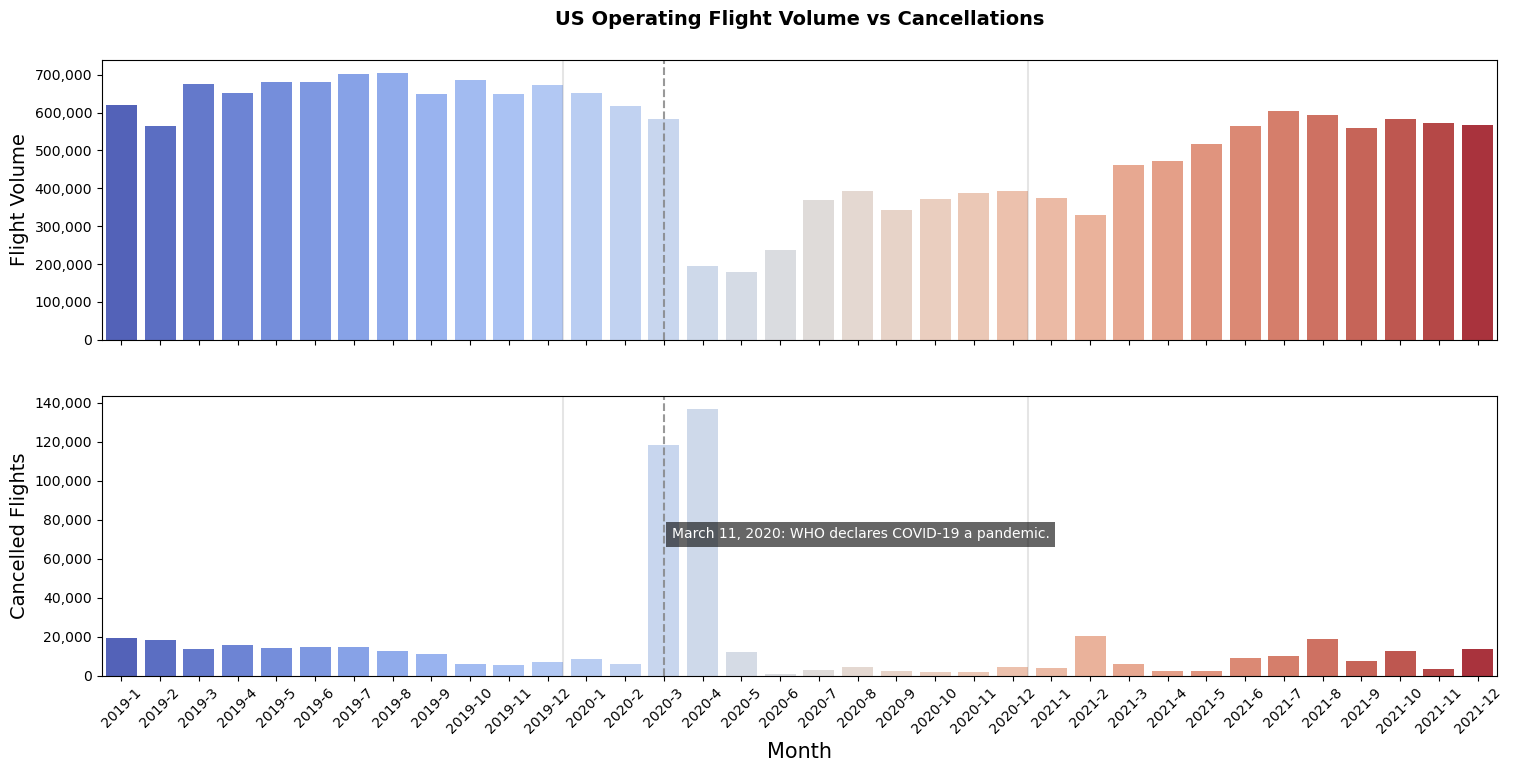

In [38]:
# 2019-21 Operating Flight Volumne vs Cancellations
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.set_figwidth(18)
fig.set_figheight(8)

#Set Title
ax1.set_title('US Operating Flight Volume vs Cancellations', pad=25, fontweight='bold', fontsize=14)

# Create Seaborn barplots 
sns.barplot(data=operated, x=operated.index, y='flight_count', palette='coolwarm', width=0.8, ax=ax1)
sns.barplot(data=cancelled, x=cancelled.index, y='Cancelled', palette='coolwarm', ax=ax2)

# Customize charts
ax1.set_ylabel('Flight Volume', size='14')
ax1.set_xlabel('')
ax1.set_xticklabels(operated.index.year.astype(str) + "-" + operated.index.month.astype(str), rotation=45)

ax2.set_ylabel('Cancelled Flights', size='14')
ax2.set_xlabel('Month', size='15')
ax2.set_xticklabels(operated.index.year.astype(str) + "-" + operated.index.month.astype(str), rotation=45)

# Plot Vertical lines
ax1.axvline(x=11.4, color='gray', linestyle='-', alpha=0.2)
ax1.axvline(x=14, color='gray', linestyle='--', alpha=0.80) # Annotation
ax1.axvline(x=23.4, color='gray', linestyle='-', alpha=0.2)
ax2.axvline(x=11.4, color='gray', linestyle='-', alpha=0.2)
ax2.axvline(x=14, color='gray', linestyle='--', alpha=0.80) # Annotation
ax2.axvline(x=23.4, color='gray', linestyle='-', alpha=0.2)

# Annotations
ax2.annotate(f"March 11, 2020: WHO declares COVID-19 a pandemic.", 
            xy=(14.2, 70500), 
            bbox=dict(facecolor='black', edgecolor='none', alpha=0.6), color='white'
            )

# Format y-axis
def format_func(value, tick_number):
    return "{:,.0f}".format(value)

ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
ax1.yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [39]:
# Flight Volume by Top 10 Airline
top_10_alines = pd.DataFrame(combined_df[combined_df['Cancelled']==False])
top_10_alines = pd.DataFrame(combined_df['MajorAirline'].value_counts()).head(10).T

top_10_alines = top_10_alines.rename(index={'MajorAirline': 'Flight Volume'})
top_10_alines.style.format('{:,.0f}')

# create a style dictionary with the CSS rules for wrapping text
style_dict = [
    {'selector': 'th', 
     'props': [('max-width', '70px'), 
               ('word-wrap', 'word'),
               ('text-overflow', 'ellipsis')]
    }
]

# Format Dataframe
top_10_alines = top_10_alines.applymap('{:,.0f}'.format)
top_10_alines.style.set_table_styles(style_dict)

,American Airlines Inc.,Delta Air Lines Inc.,United Air Lines Inc.,Southwest Airlines Co.,Alaska Airlines Inc.,JetBlue Airways,Spirit Air Lines,Frontier Airlines Inc.,Allegiant Air,Hawaiian Airlines Inc.
Flight Volume,"5,096,872","4,190,263","3,605,095","3,389,862","1,085,859","644,276","531,308","363,860","319,675","198,882"
